# Frame Classification using ResNet + LSTM with binary feature vectors

This notebook creates and trains an LSTM based classifier with a dataset build arround feature vectors of dimension 512 extracted from binary images.

In [1]:
from utils2 import *
import os
import pandas as pd

%load_ext autoreload
%autoreload 2

## Train models

We will use the best configuration we found with our wandb project

In [2]:
best_config = {
    'abs_path': '../', # project path 
    'sequence_length': 300, 
    'backbone': 'resnet',
    'layers': 'lstm',
    'dropout_rate': 0.5,
    'num_layers': 1,
    'num_units': 128,
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': 32,
    'es_monitor': 'val_prc',
    'es_mode': 'max',
    'es_patience': 5,
    'norm' : False,
    'num_heads' : 1,
    'model_name' : 'lstm512_binary'
}

## Final model Training & Evaluation

(307, 300, 512) (307, 300, 2)
(122, 300, 512) (122, 300, 2)
Running experiment for Grooming
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4730 - fn: 2337.8000 - fp: 21788.9004 - loss: 0.7390 - prc: 0.1335 - precision: 0.1372 - recall: 0.6645 - tn: 24916.3008 - tp: 3367.0000   
Epoch 1: val_loss improved from inf to 0.66703, saving model to lstm512_binary_grooming.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.4897 - fn: 2568.0000 - fp: 22247.1816 - loss: 0.7342 - prc: 0.1334 - precision: 0.1383 - recall: 0.6490 - tn: 27710.8184 - tp: 3492.1819 - val_accuracy: 0.6074 - val_fn: 27.0000 - val_fp: 14341.0000 - val_loss: 0.6670 - val_prc: 0.7319 - val_precision: 0.1973 - val_recall: 0.9924 - val_tn: 18708.0000 - val_tp: 3524.0000
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 909ms/step - accuracy: 0.7958 - fn: 1105.3000 - fp: 8428.7998 - loss: 0.5567 - prc: 0.5515 - precision: 0.3153 - recall: 0.8220 - tn: 38661.5000 - tp: 4214.3999
Epoch 2: val_loss improved from 0.

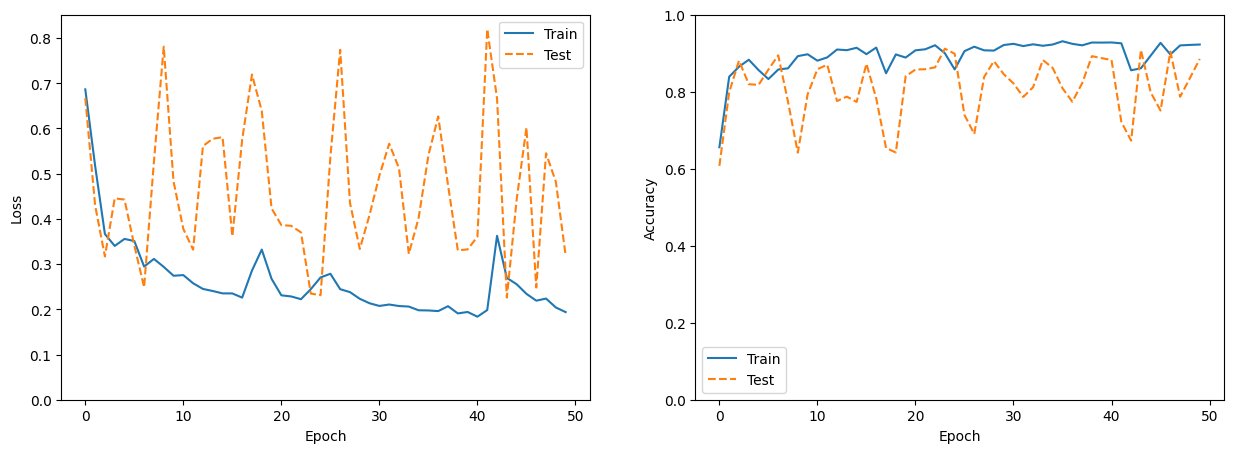

10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step  


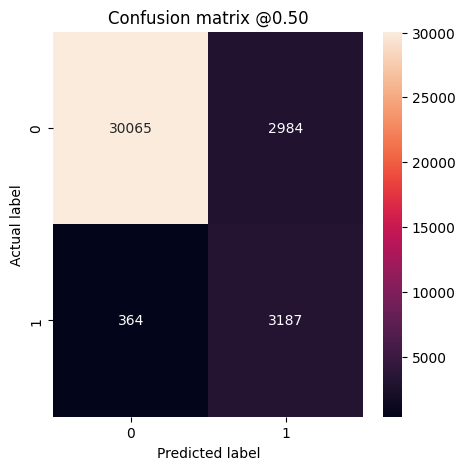

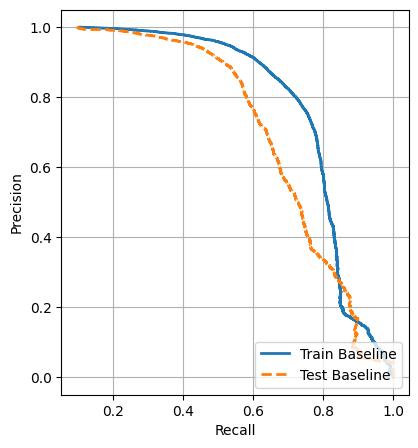

Running experiment for Rearing


/Users/saraalbarran/Documents/SARA/ratolins/AutomatedMouseBehaviorRecognition/notebooks/utils2.py:381: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_metrics = pd.concat([


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5368 - fn: 8050.2002 - fp: 16080.9004 - loss: 0.7256 - prc: 0.2755 - precision: 0.2933 - recall: 0.4224 - tn: 22633.5000 - tp: 5645.3999
Epoch 1: val_loss improved from inf to 0.77823, saving model to lstm512_binary_rearing.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 92s 7s/step - accuracy: 0.5410 - fn: 8761.1816 - fp: 16666.5449 - loss: 0.7247 - prc: 0.2751 - precision: 0.2911 - recall: 0.4152 - tn: 24703.4551 - tp: 5887.0000 - val_accuracy: 0.1010 - val_fn: 0.0000e+00 - val_fp: 32903.0000 - val_loss: 0.7782 - val_prc: 0.1867 - val_precision: 0.1010 - val_recall: 1.0000 - val_tn: 0.0000e+00 - val_tp: 3697.0000
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3149 - fn: 1546.6000 - fp: 32707.9004 - loss: 0.6819 - prc: 0.3338 - precision: 0.2583 - recall: 0.9261 - tn: 6410.7998 - tp: 11744.7002
Epoch 2: val_loss improved from 0.77823 to 0.62935, saving model to lstm512_binary_rearing.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3

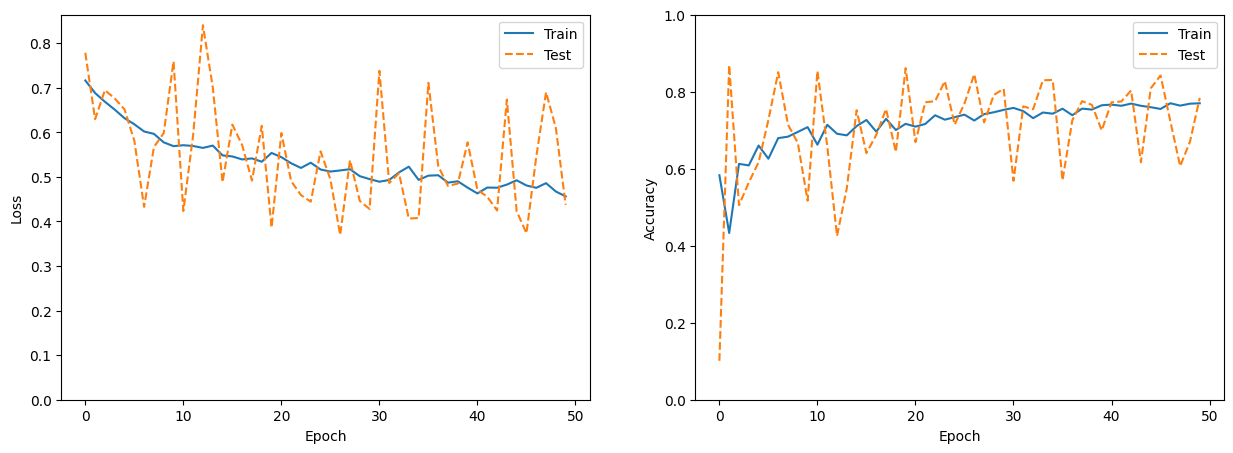

10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step 


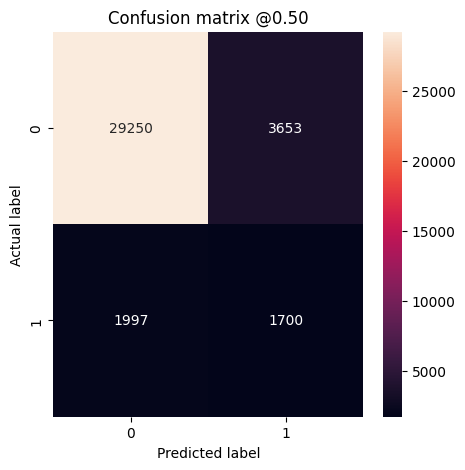

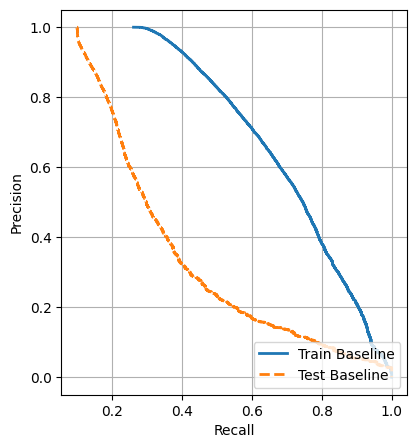

In [3]:
metrics = train_test_model(best_config)

## Evaluate model

On the following section we will evaluate the model on the validation set. 

In [4]:
from evaluation_utils import *
import keras
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Load validation data
path = '../data/processed/Dataset/'
val_data = load_dataset(path, 'resnet')
print('Validation videos: ', val_data.keys())

# Per each video, generate sequences
val_seq = {}
for i in list(val_data.keys()):
    X, Y = generate_sequences(val_data[i], 300, normalize=True)
    val_seq[i] = [X, Y]

behaviours = ['Grooming', 'Rearing']

# We will load the models
if 'Grooming' in behaviours:
    model_grooming = keras.models.load_model('lstm512_binary_grooming.keras', compile=True)
if 'Rearing' in behaviours:
    model_rearing = keras.models.load_model('lstm512_binary_rearing.keras', compile=True)

# Create 2 dataframes to store metrics for each behaviour
metrics_g = pd.DataFrame(columns=['Accuracy', 'Precission', 'Recall', 'PRC'], index=list(val_data.keys()))
metrics_r = pd.DataFrame(columns=['Accuracy', 'Precission','Recall', 'PRC'], index=list(val_data.keys()))

Validation videos:  dict_keys(['1', 'Animal62418', 'HD_ChR2_480A'])


In [14]:
metrics_g

,Accuracy,Precission,Recall,PRC
1,0.981539,1.0,0.357143,0.887283
Animal62418,0.966984,0.658009,0.858757,0.890511
HD_ChR2_480A,0.918841,0.742958,0.912104,0.921221


In [15]:
metrics_r

,Accuracy,Precission,Recall,PRC
1,0.955898,0.15,0.283784,0.140269
Animal62418,0.55254,0.24453,0.940063,0.752419
HD_ChR2_480A,0.817826,0.465753,0.587727,0.581699


### Results video 1.mp4

In [8]:
X, Y = val_seq['1']

# Append metrics to dataset
metrics_g.loc['1'] = model_grooming.evaluate(X, Y[:,:,0])[-4:]
metrics_r.loc['1'] = model_rearing.evaluate(X, Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.9815 - fn: 72.0000 - fp: 0.0000e+00 - loss: 0.0964 - prc: 0.8873 - precision: 1.0000 - recall: 0.3571 - tn: 3788.0000 - tp: 40.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.9559 - fn: 53.0000 - fp: 119.0000 - loss: 0.4066 - prc: 0.1403 - precision: 0.1500 - recall: 0.2838 - tn: 3707.0000 - tp: 21.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step


We will start by plotting the labels and actual predictions along the video frames.


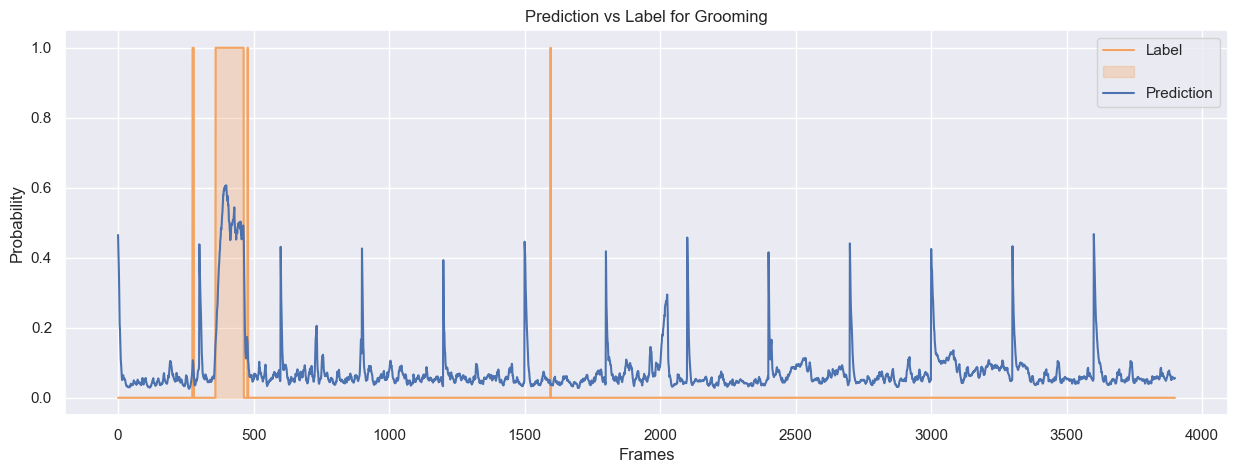

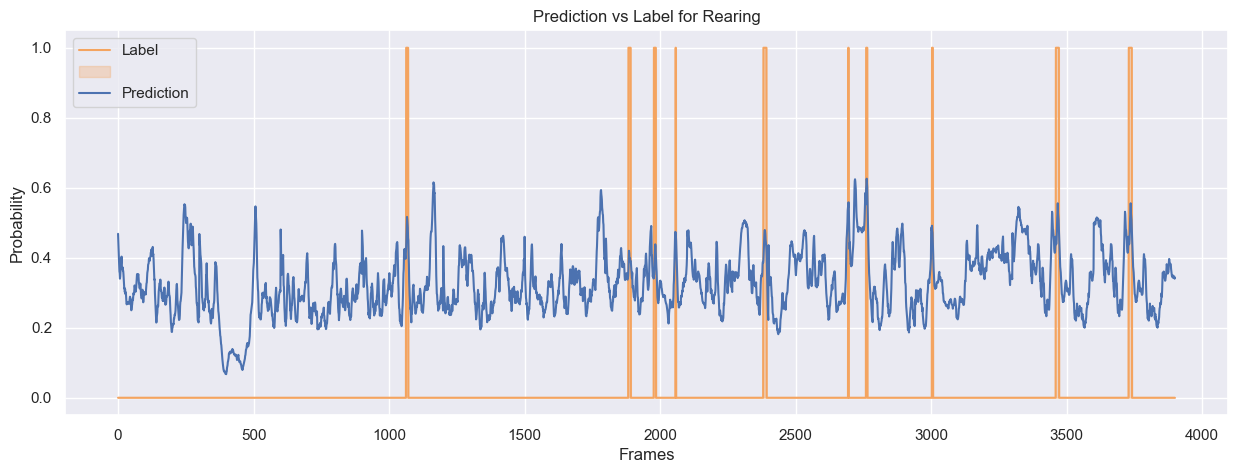

We will compute the PRC curve to choose the best threshold.


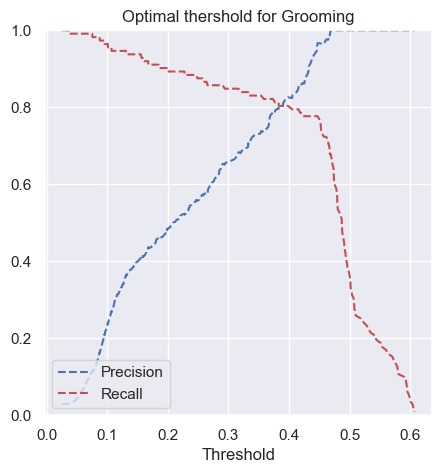

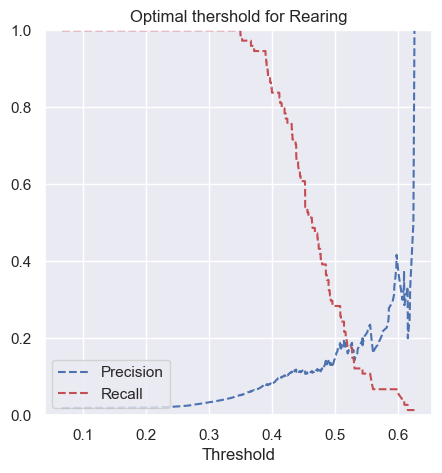

Lastly we will plot the confussion matrix for each behaviour


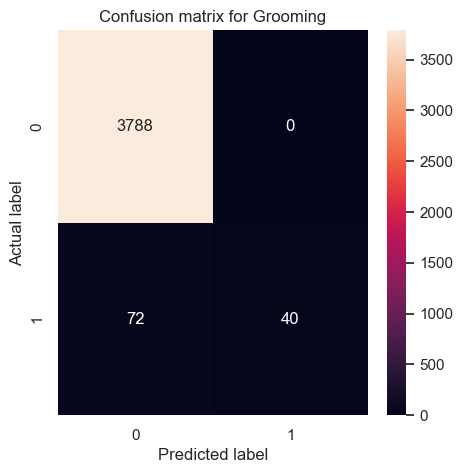

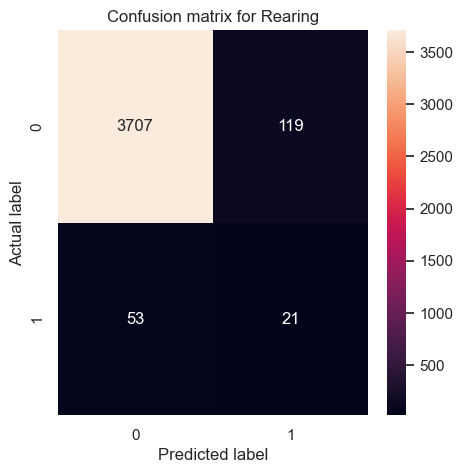

In [9]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)

### Results video Animal62418.mp4

In [10]:
X, Y = val_seq['Animal62418']

# Append metrics to dataset
metrics_g.loc['Animal62418'] = model_grooming.evaluate(X, Y[:,:,0])[-4:]
metrics_r.loc['Animal62418'] = model_rearing.evaluate(X, Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.9670 - fn: 50.0000 - fp: 158.0000 - loss: 0.2465 - prc: 0.8905 - precision: 0.6580 - recall: 0.8588 - tn: 5788.0000 - tp: 304.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5525 - fn: 57.0000 - fp: 2762.0000 - loss: 0.6632 - prc: 0.7524 - precision: 0.2445 - recall: 0.9401 - tn: 2587.0000 - tp: 894.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


We will start by plotting the labels and actual predictions along the video frames.


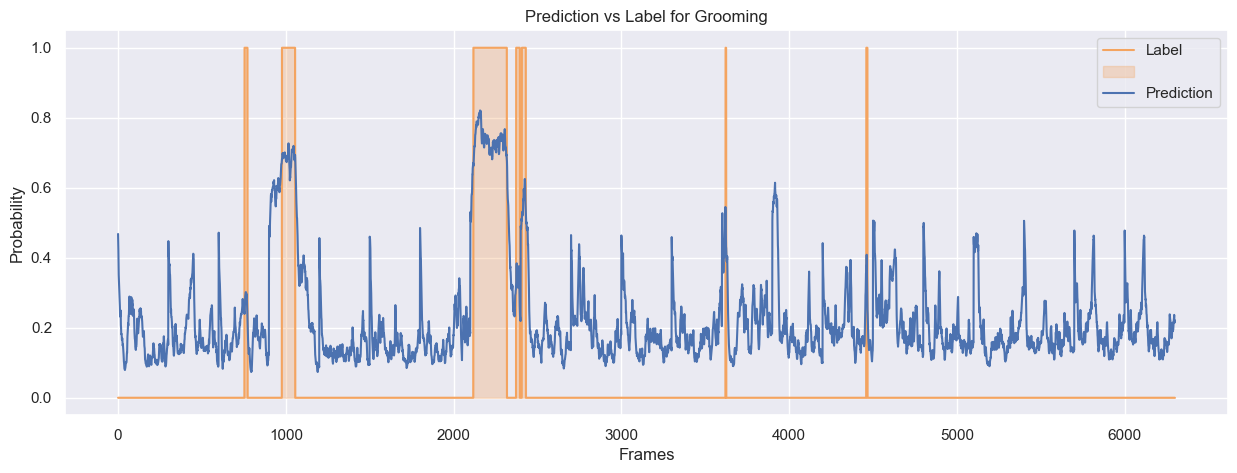

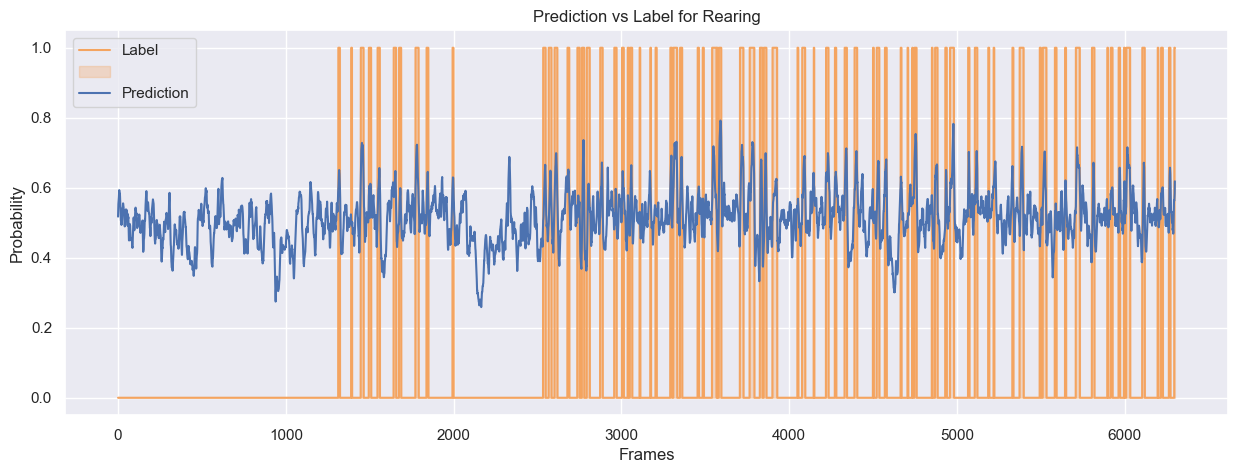

We will compute the PRC curve to choose the best threshold.


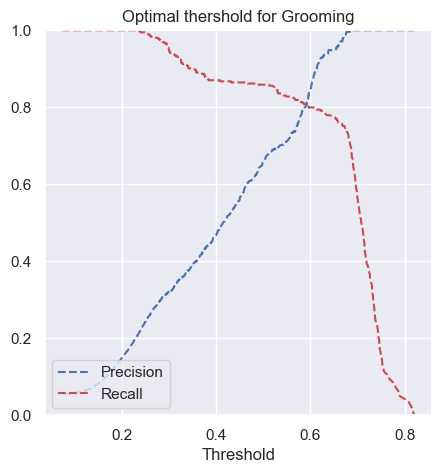

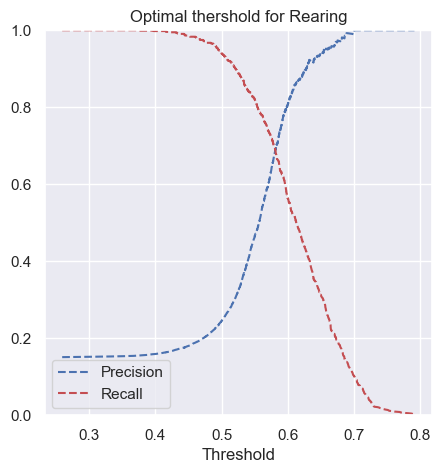

Lastly we will plot the confussion matrix for each behaviour


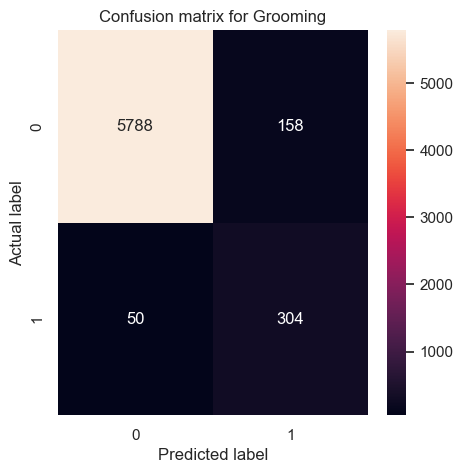

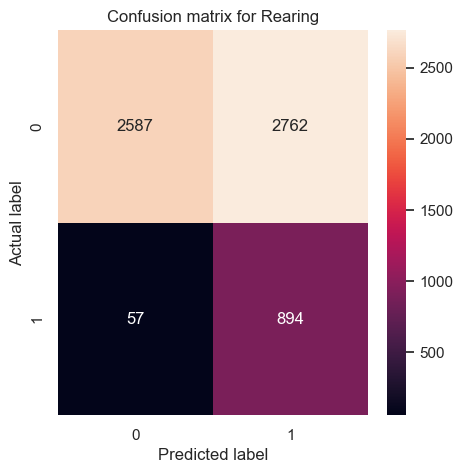

In [11]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)

### Results video HD_ChR2_480A.mp4

In [12]:
X, Y = val_seq['HD_ChR2_480A']

# Append metrics to dataset
metrics_g.loc['HD_ChR2_480A'] = model_grooming.evaluate(X, Y[:,:,0])[-4:]
metrics_r.loc['HD_ChR2_480A'] = model_rearing.evaluate(X, Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.9188 - fn: 122.0000 - fp: 438.0000 - loss: 0.2462 - prc: 0.9212 - precision: 0.7430 - recall: 0.9121 - tn: 5074.0000 - tp: 1266.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8178 - fn: 477.0000 - fp: 780.0000 - loss: 0.5046 - prc: 0.5817 - precision: 0.4658 - recall: 0.5877 - tn: 4963.0000 - tp: 680.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


We will start by plotting the labels and actual predictions along the video frames.


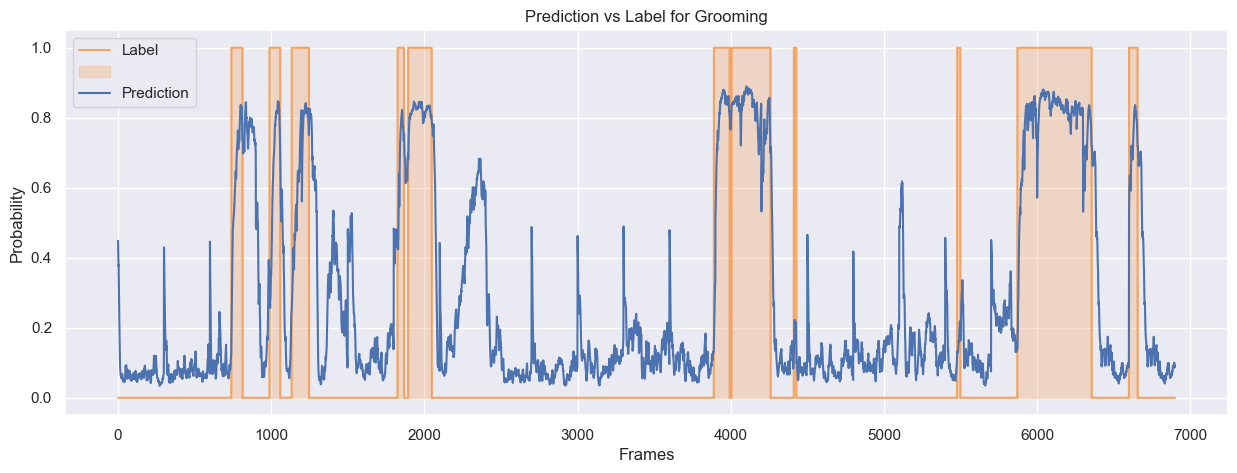

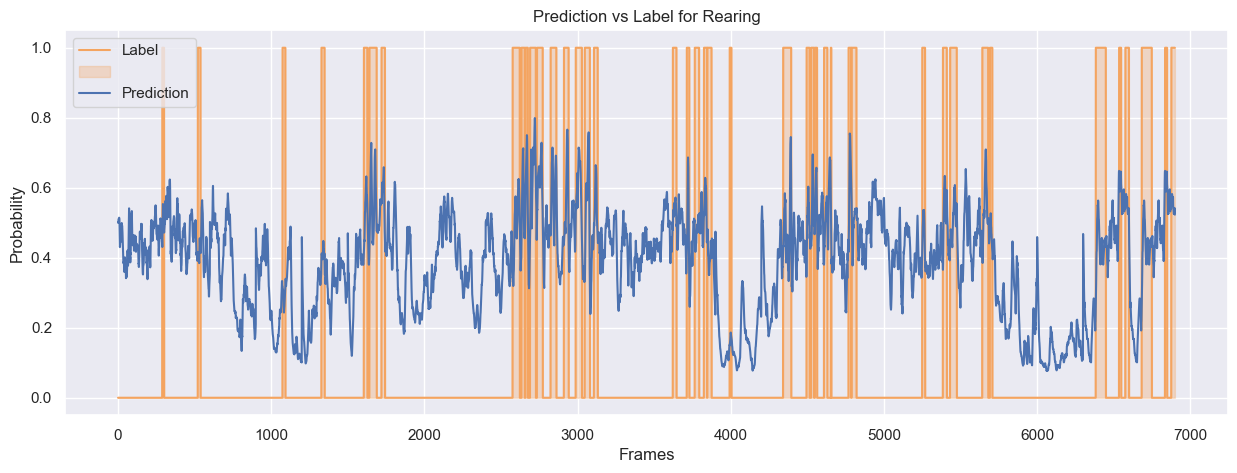

We will compute the PRC curve to choose the best threshold.


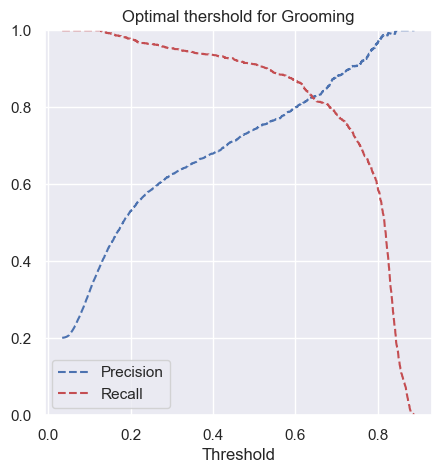

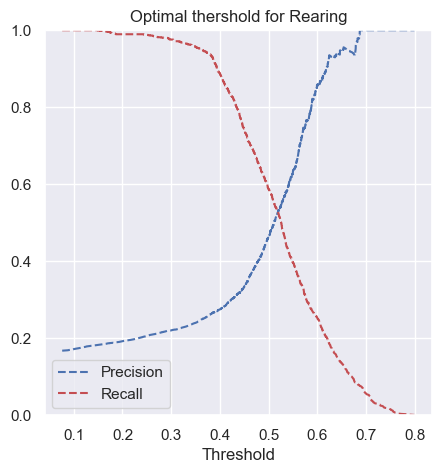

Lastly we will plot the confussion matrix for each behaviour


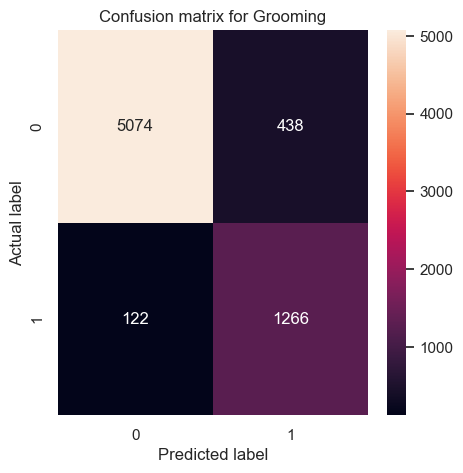

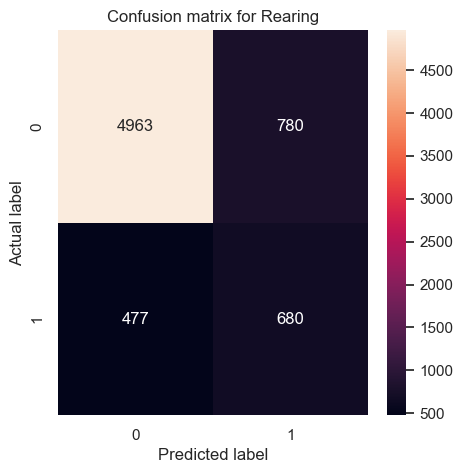

In [13]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)